# ***Business Context***

# Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

In [ ]:
#Importing all Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
import folium

In [2]:
#improting drive for csv file access.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#assigning file as database(db01)

db01='/content/drive/My Drive/alma project/Airbnb NYC 2019.csv'

#creating dataframe
airbnb_df=pd.read_csv(db01)


In [4]:
#checking the size of the airbnb_df
print("Size of DataFrame : ",airbnb_df.size)

# checking the shape of Dataframe
airbnb_df = pd.DataFrame(airbnb_df)
rows, columns = airbnb_df.shape
print("Rows : ", rows, "\nColumns : ", columns)


Size of DataFrame :  782320
Rows :  48895 
Columns :  16


In [5]:
#checking datatype for dataframe
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# Counting the number of null values or empty cells in each column
null_counts = airbnb_df.isnull().sum()
empty_counts = (airbnb_df == '').sum()

# Print the counts
print("Null Value Counts:")
print(null_counts)
print("\nEmpty Cell Counts:")
print(empty_counts)

Null Value Counts:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Empty Cell Counts:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type           

In [7]:
# Calculate the mean of reviews_per_month
mean_review = airbnb_df['reviews_per_month'].mean()

# Fill null values in column reviews_per_month with the mean value
airbnb_df['reviews_per_month'].fillna(mean_review, inplace=True)

#checking aggain null for null values
null_counts = airbnb_df.isnull().sum()

# Print the counts after null values replaced
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
# Converting the 'last_review' column from object to date type
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

# after converting checking the data type
print('DATA TYPE:')
print(airbnb_df.dtypes)


DATA TYPE:
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [9]:
# Drop rows with null values in column name & host_name
airbnb_df.dropna(subset=['name', 'host_name'], inplace=True)

# Fill null values with the most recent date
most_recent_date = airbnb_df['last_review'].max()
airbnb_df['last_review'].fillna(most_recent_date, inplace=True)

# checking size of dataframe after dropping null values and replace them
print('size of Data Frame:', airbnb_df.size)


# drop duplicate value in airbnb_df
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)

# checking the shape of Dataframe
airbnb_df = pd.DataFrame(airbnb_df)

print(airbnb_df.info())


size of Data Frame: 781728
<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  

In [156]:
# fetching head of airbnb_df
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-08,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [11]:
#tail of airbnb_df
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,1.373221,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,2019-07-08,1.373221,1,23


In [12]:
#getting thoes colunms which is required for analysis of hosts
airbnb_df_new=airbnb_df.loc[:,['host_id','host_name','price','number_of_reviews','latitude','longitude','reviews_per_month','room_type','availability_365','minimum_nights','neighbourhood_group','neighbourhood']]
airbnb_df_new

,host_id,host_name,price,number_of_reviews,latitude,longitude,reviews_per_month,room_type,availability_365,minimum_nights,neighbourhood_group,neighbourhood
0,2787,John,149,9,40.64749,-73.97237,0.210000,Private room,365,1,Brooklyn,Kensington
1,2845,Jennifer,225,45,40.75362,-73.98377,0.380000,Entire home/apt,355,1,Manhattan,Midtown
2,4632,Elisabeth,150,0,40.80902,-73.94190,1.373221,Private room,365,3,Manhattan,Harlem
3,4869,LisaRoxanne,89,270,40.68514,-73.95976,4.640000,Entire home/apt,194,1,Brooklyn,Clinton Hill
4,7192,Laura,80,9,40.79851,-73.94399,0.100000,Entire home/apt,0,10,Manhattan,East Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,70,0,40.67853,-73.94995,1.373221,Private room,9,2,Brooklyn,Bedford-Stuyvesant
48891,6570630,Marisol,40,0,40.70184,-73.93317,1.373221,Private room,36,4,Brooklyn,Bushwick
48892,23492952,Ilgar & Aysel,115,0,40.81475,-73.94867,1.373221,Entire home/apt,27,10,Manhattan,Harlem
48893,30985759,Taz,55,0,40.75751,-73.99112,1.373221,Shared room,2,1,Manhattan,Hell's Kitchen


In [13]:
#checking null values or missing data
airbnb_df_new.isnull().sum()

host_id                0
host_name              0
price                  0
number_of_reviews      0
latitude               0
longitude              0
reviews_per_month      0
room_type              0
availability_365       0
minimum_nights         0
neighbourhood_group    0
neighbourhood          0
dtype: int64

In [14]:
#we have clean data now
print(type(airbnb_df_new["host_id"]))
print(type(airbnb_df_new['host_name']))
print(type(airbnb_df_new["availability_365"]))
print(type(airbnb_df_new["number_of_reviews"]))
print(type(airbnb_df_new["reviews_per_month"]))
print(type(airbnb_df_new["price"]))
print(type(airbnb_df_new['neighbourhood_group']))
print(type(airbnb_df_new['neighbourhood']))
print(type(airbnb_df_new['room_type']))
print(type(airbnb_df_new['latitude']))
print(type(airbnb_df_new['longitude']))
print(type(airbnb_df_new['minimum_nights']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Checking which Neighborhood getting more booking using Airbnb
From this visualization, we can draw the following conclusions:

* Manhattan has the highest count of Airbnb listings among all the neighborhood groups, with over 20,000 listings.
* Brooklyn has the second-highest count, followed by Queens.
* Staten Island and Bronx have the lowest counts of Airbnb listings among the neighborhood groups.

Overall, this visualization provides insights into the distribution of Airbnb listings across different neighborhood groups in terms of the count of listings. It highlights the popularity of Manhattan as a location for Airbnb listings compared to other areas.

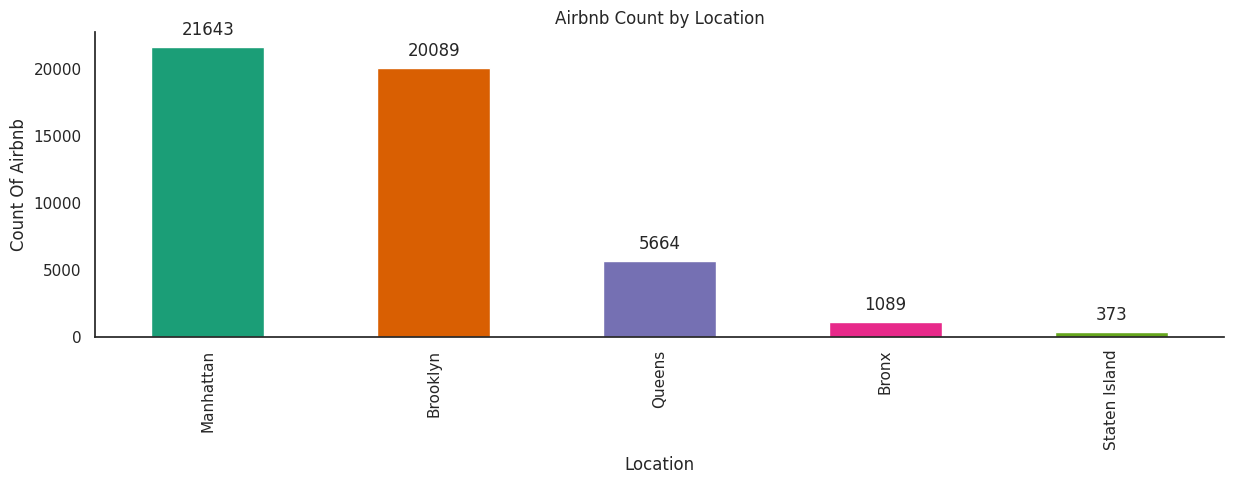

In [114]:
plt.figure(figsize=(12.5,5))
pb=airbnb_df_new.groupby('neighbourhood_group').size().sort_values(ascending = False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Add data labels on the bars
for p in pb.patches:
    pb.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 12),
                  textcoords = 'offset points')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Count Of Airbnb')
plt.title("Airbnb Count by Location")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

# Getting Review per month

By observing the Heatmap, we can see the distribution of reviews per month across different room types and Locations.
For example, in Brooklyn and Manhattan, Entire home/apartment listings tend to have higher numbers of reviews per month compared to Private room and Shared room listings. However, in Staten Island and Bronx, the number of reviews per month is generally lower across all room types.
This visualization provides insights into the popularity of different types of accommodations across different Locations in terms of the number of reviews they receive per month.

In [17]:
#head of new airbnb data frame
airbnb_df_new.sort_values(['price'], ascending=False).head()
max_price_df = airbnb_df_new.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df


,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


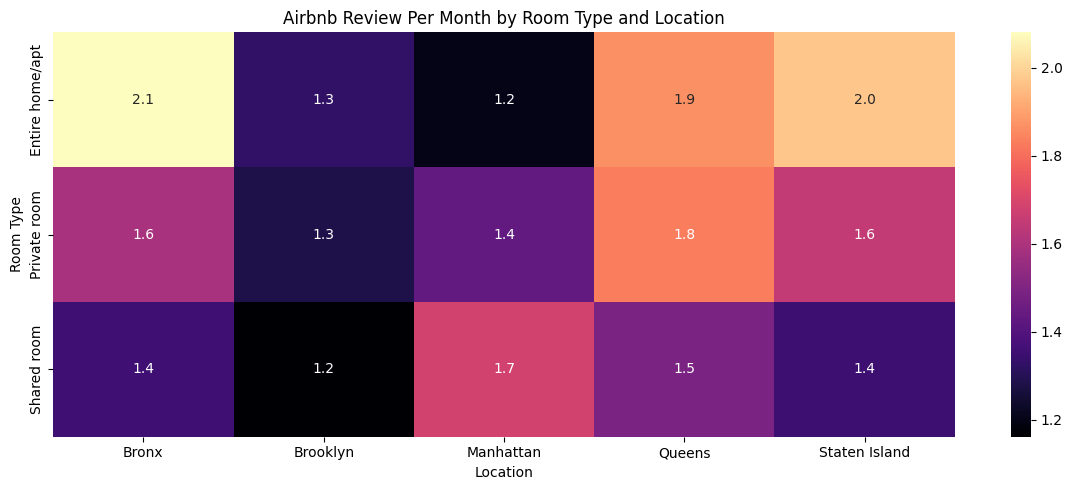

In [18]:
# Pivot the DataFrame to prepare it for the heatmap
heatmap_data = airbnb_df_new.pivot_table(index='room_type', columns='neighbourhood_group', values='reviews_per_month', aggfunc='mean')

# Set the figure size
plt.figure(figsize=(12, 5))

# Create the heatmap with data values displayed
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='magma')

plt.xlabel('Location')
plt.ylabel('Room Type')
plt.title('Airbnb Review Per Month by Room Type and Location')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


# Same review using scatter plot


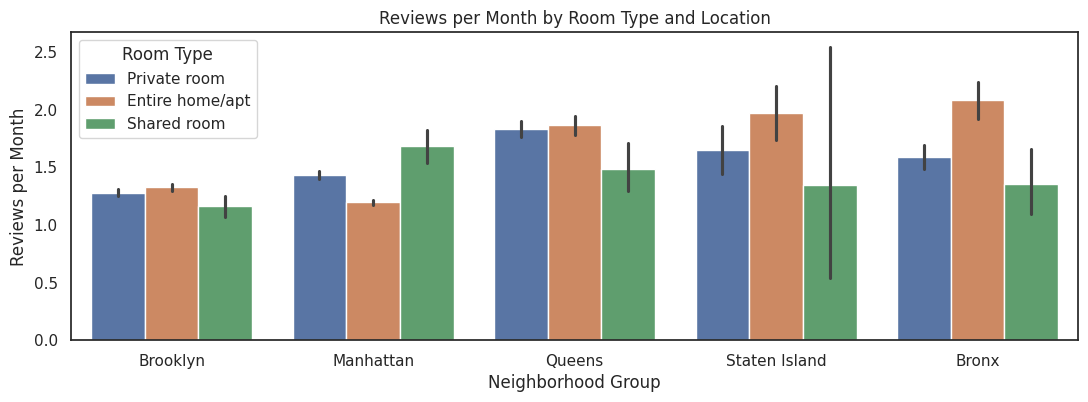

In [222]:
# Create a scatterplot with reviews_per_month on the y-axis, room_type on the x-axis, and colored by neighbourhood_group

plt.figure(figsize=(13,4))
sns.barplot(data=airbnb_df_new, y="reviews_per_month", x="neighbourhood_group", hue="room_type")

# Add title and labels
plt.title("Reviews per Month by Room Type and Location")
plt.xlabel("Neighborhood Group")
plt.ylabel("Reviews per Month")
plt.legend(title='Room Type')

# Show the plot
plt.show()

# Checking Avg. DATA for Rooms which are less preferred

From this visualization, we can draw the following conclusions:

* Shared rooms have the highest average availability, with approximately 161.83 days on average.
* Entire home/apartments have slightly lower average availability compared to Shared rooms, with approximately 111.91 days on average.
* Private rooms have the lowest average availability among the three types, with approximately 111.26 days on average.

Overall, this visualization provides insights into the average availability of different types of Airbnb listings, indicating that Shared rooms tend to have the highest availability compared to Private rooms and Entire home/apartments.

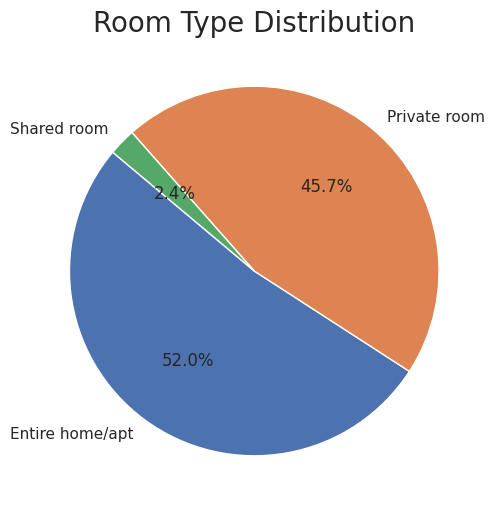

In [116]:
# Calculate the frequency of each room type
roomtype_freq = airbnb_df_new['room_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(roomtype_freq, labels=roomtype_freq.index, autopct='%1.1f%%', startangle=140)

plt.title('Room Type Distribution', fontsize=20)
plt.show()

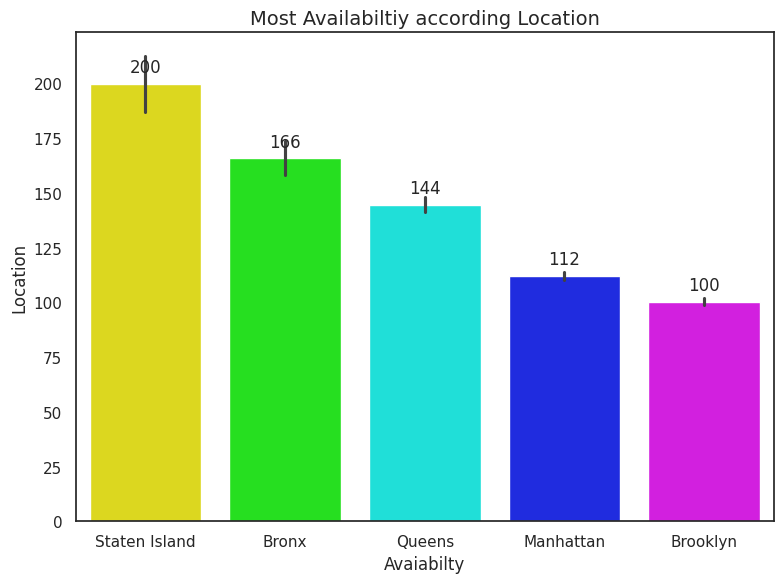

In [147]:
# Creating bar plot for Availability according neighborhood
plt.figure(figsize=(8, 6))
order = airbnb_df_new.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=False).index
pb = sns.barplot(x='neighbourhood_group', y='availability_365', data=airbnb_df_new, order=order, palette='hsv')

# Add data labels on the bars
for p in pb.patches:
    pb.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 12),
                  textcoords = 'offset points')

plt.title('Most Availabiltiy according Location', fontsize= 14)
plt.xlabel('Avaiabilty', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# **Price** **by** **Location**
There is a wide range of prices among Airbnb listings, ranging from low-priced to high-priced accommodations.
Listings with higher prices are scattered across different locations, but there seems to be a concentration of higher-priced listings in certain areas, especially in the central region of the plotted area.
Lower-priced listings are more uniformly distributed across the plotted area.
The density of listings varies across different regions, with some areas having a higher concentration of listings compared to others.

**Overall, this scatter plot provides insights into the spatial distribution of Airbnb listings and how prices vary across different locations.**

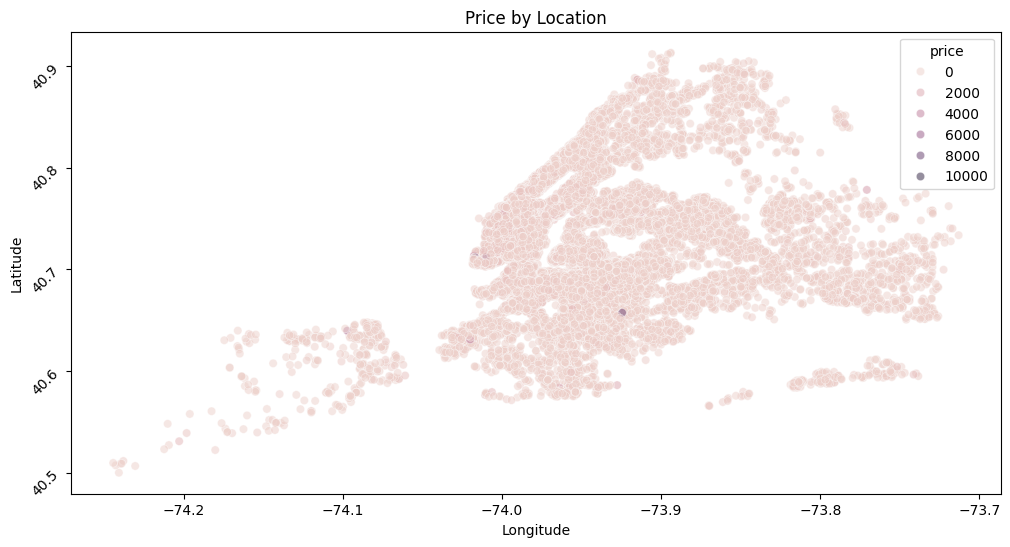

In [66]:
# Create a scatter plot with Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=airbnb_df_new, x="longitude", y="latitude", hue="price", alpha=.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(rotation=45, ha='right')
plt.title("Price by Location")
plt.show()

In [32]:
#identify the observations where minimum nights is 1 and price is minimum
airbnb_df_new[airbnb_df_new['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,host_id,host_name,price,number_of_reviews,latitude,longitude,reviews_per_month,room_type,availability_365,minimum_nights,neighbourhood_group,neighbourhood
25794,86327101,Adeyemi,0,93,40.68173,-73.91342,4.280000,Private room,176,1,Brooklyn,Bedford-Stuyvesant
25795,86327101,Adeyemi,0,95,40.68279,-73.91170,4.370000,Private room,232,1,Brooklyn,Bedford-Stuyvesant
25796,86327101,Adeyemi,0,95,40.68258,-73.91284,4.350000,Private room,222,1,Brooklyn,Bedford-Stuyvesant
21700,33511962,Morgan,10,0,40.81302,-73.95349,1.373221,Shared room,0,1,Manhattan,Harlem
22835,97001292,Maria,10,43,40.69085,-73.79916,1.680000,Entire home/apt,252,1,Queens,Jamaica
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,3750764,Kevin,6800,0,40.75060,-74.00388,1.373221,Entire home/apt,364,1,Manhattan,Chelsea
42523,7407743,Jack,7500,0,40.71162,-74.01693,1.373221,Entire home/apt,364,1,Manhattan,Battery Park City
45666,262534951,Sandra,7500,8,40.65724,-73.92450,6.150000,Private room,179,1,Brooklyn,East Flatbush
29662,156158778,Sally,7703,0,40.76824,-73.95989,1.373221,Entire home/apt,146,1,Manhattan,Upper East Side


In [33]:
#Get the number of values which price is less than 100$
print('Less then 100$ price :')
print(airbnb_df_new.loc[airbnb_df['price'] < 100,'price'].count())


#Make a copy of original dataframe to perform additional operation for get the desire result
price_df = airbnb_df_new.copy()


#Find the mean value of price which value is less than 100$
print('mean price for less than 100$ is :')
print(round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()))


#Count how many rows have amount = 0$
print("With 0$ price :")
print(price_df[price_df['price']==0].count())


Less then 100$ price :
21861
mean price for less than 100$ is :
65
With 0$ price :
host_id                11
host_name              11
price                  11
number_of_reviews      11
latitude               11
longitude              11
reviews_per_month      11
room_type              11
availability_365       11
minimum_nights         11
neighbourhood_group    11
neighbourhood          11
dtype: int64


In [34]:
#Find the observations where price is 0$
price_df[price_df['price']==0]

,host_id,host_name,price,number_of_reviews,latitude,longitude,reviews_per_month,room_type,availability_365,minimum_nights,neighbourhood_group,neighbourhood
23161,8993084,Kimberly,0,1,40.69023,-73.95428,0.050000,Private room,28,4,Brooklyn,Bedford-Stuyvesant
25433,131697576,Anisha,0,55,40.83296,-73.88668,2.560000,Private room,127,2,Bronx,East Morrisania
25634,15787004,Martial Loft,0,16,40.69467,-73.92433,0.710000,Private room,0,2,Brooklyn,Bushwick
25753,1641537,Lauren,0,12,40.72462,-73.94072,0.530000,Private room,0,2,Brooklyn,Greenpoint
25778,10132166,Aymeric,0,3,40.70838,-73.94645,0.150000,Entire home/apt,73,5,Brooklyn,Williamsburg
25794,86327101,Adeyemi,0,93,40.68173,-73.91342,4.280000,Private room,176,1,Brooklyn,Bedford-Stuyvesant
25795,86327101,Adeyemi,0,95,40.68279,-73.91170,4.370000,Private room,232,1,Brooklyn,Bedford-Stuyvesant
25796,86327101,Adeyemi,0,95,40.68258,-73.91284,4.350000,Private room,222,1,Brooklyn,Bedford-Stuyvesant
26259,13709292,Qiuchi,0,0,40.75091,-73.97597,1.373221,Entire home/apt,0,3,Manhattan,Murray Hill
26841,101970559,Sergii,0,2,40.69211,-73.90670,0.110000,Shared room,333,30,Brooklyn,Bushwick


In [35]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price = round(airbnb_df_new.loc[airbnb_df_new['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

#Replace the value of price according to minimum night where price = 0$
price_df['price'] = np.where(
   (price_df['price'] == 0) ,price_calculator(price_df['minimum_nights']) , price_df['price'])

In [216]:
#Our new description of dataset
price_df.describe()

,host_id,host_name,price,number_of_reviews,latitude,longitude,reviews_per_month,room_type,availability_365,minimum_nights,neighbourhood_group,neighbourhood
0,2787,John,149,9,40.64749,-73.97237,0.210000,Private room,365,1,Brooklyn,Kensington
1,2845,Jennifer,225,45,40.75362,-73.98377,0.380000,Entire home/apt,355,1,Manhattan,Midtown
2,4632,Elisabeth,150,0,40.80902,-73.94190,1.373221,Private room,365,3,Manhattan,Harlem
3,4869,LisaRoxanne,89,270,40.68514,-73.95976,4.640000,Entire home/apt,194,1,Brooklyn,Clinton Hill
4,7192,Laura,80,9,40.79851,-73.94399,0.100000,Entire home/apt,0,10,Manhattan,East Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,70,0,40.67853,-73.94995,1.373221,Private room,9,2,Brooklyn,Bedford-Stuyvesant
48891,6570630,Marisol,40,0,40.70184,-73.93317,1.373221,Private room,36,4,Brooklyn,Bushwick
48892,23492952,Ilgar & Aysel,115,0,40.81475,-73.94867,1.373221,Entire home/apt,27,10,Manhattan,Harlem
48893,30985759,Taz,55,0,40.75751,-73.99112,1.373221,Shared room,2,1,Manhattan,Hell's Kitchen


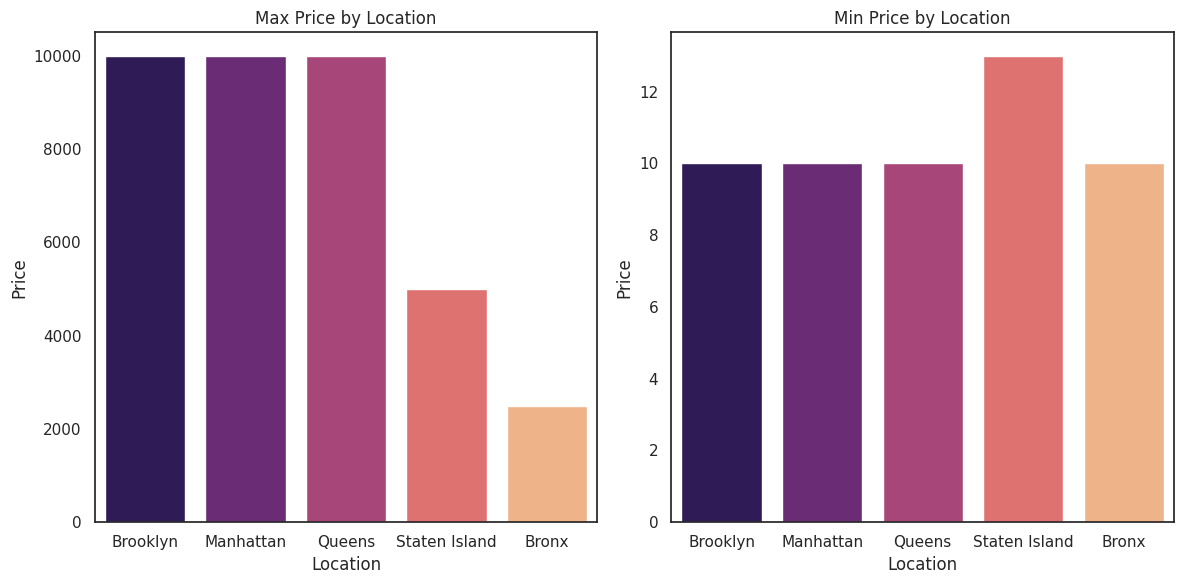

In [219]:
#Get the highest rent according to location
max_price_loc=price_df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending=False).rename(columns={'price':'Maximum price','neighbourhood_group':'Location'})

#Get the lowest rent according to location
min_price_loc=price_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending=False).rename(columns={'price':'Minimum price','neighbourhood_group':'Location'})


#Get the combine dataframe of minimum and maximum price according to location
merge_price_loc = pd.merge(max_price_loc, min_price_loc, on='Location')
merge_price_loc

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot maximum price by location
sns.barplot(x='Location', y='Maximum price', data=merge_price_loc, ax=axes[0], palette='magma')
axes[0].set_title('Max Price by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Price')

# Plot minimum price by location
sns.barplot(x='Location', y='Minimum price', data=merge_price_loc, ax=axes[1], palette='magma')
axes[1].set_title('Min Price by Location')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


In [90]:
#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_df.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [91]:
# Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]

[('in', 16723),
 ('room', 9383),
 ('bedroom', 7226),
 ('private', 6983),
 ('apartment', 6112),
 ('cozy', 4631),
 ('the', 3866),
 ('to', 3826),
 ('studio', 3770),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3383),
 ('1', 3355),
 ('with', 3092),
 ('2', 3078),
 ('of', 2992),
 ('east', 2966),
 ('and', 2868),
 ('manhattan', 2854),
 ('&', 2820),
 ('park', 2631),
 ('sunny', 2535),
 ('beautiful', 2319),
 ('near', 2293),
 ('williamsburg', 2292)]

In [96]:
# Cleaning the List by removing prepositions
items_to_remove = {('in', 16723), ('the', 3866), ('to', 3826), ('of', 2992), ('-', 2272),('2', 3078), ('1', 3355), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25


#converting the data into DataFrame
word_count_df = pd.DataFrame(top_25)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_df

,Words,Counts
0,room,9383
1,bedroom,7226
2,private,6983
3,apartment,6112
4,cozy,4631
5,studio,3770
6,brooklyn,3629
7,apt,3571
8,spacious,3383
9,with,3092


[Text(0, 0, 'room'),
 Text(1, 0, 'bedroom'),
 Text(2, 0, 'private'),
 Text(3, 0, 'apartment'),
 Text(4, 0, 'cozy'),
 Text(5, 0, 'studio'),
 Text(6, 0, 'brooklyn'),
 Text(7, 0, 'apt'),
 Text(8, 0, 'spacious'),
 Text(9, 0, 'with'),
 Text(10, 0, 'east'),
 Text(11, 0, 'and'),
 Text(12, 0, 'manhattan'),
 Text(13, 0, '&'),
 Text(14, 0, 'park'),
 Text(15, 0, 'sunny'),
 Text(16, 0, 'beautiful'),
 Text(17, 0, 'near'),
 Text(18, 0, 'williamsburg'),
 Text(19, 0, 'village'),
 Text(20, 0, 'heart'),
 Text(21, 0, 'large'),
 Text(22, 0, 'loft'),
 Text(23, 0, 'nyc'),
 Text(24, 0, 'central')]

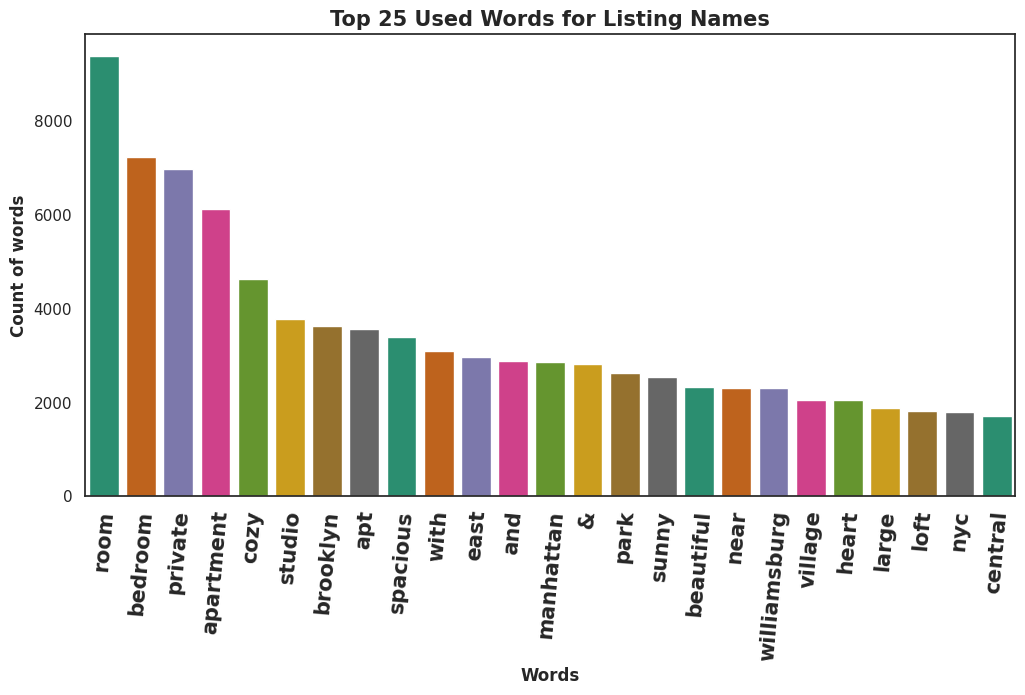

In [141]:
#Setting the figure size
sns.set(rc={'figure.figsize':(12,6)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
count_viz = sns.barplot(x='Words',y='Counts', data = word_count_df, palette='Dark2')

# Naming the Chart
count_viz.set_title('Top 25 Used Words for Listing Names', weight = 'bold').set_fontsize('15')


# Naming X & Y axis
count_viz.set_ylabel('Count of words', weight = 'bold')
count_viz.set_xlabel('Words', weight = 'bold')

#Adjusting Bar labels
count_viz.set_xticklabels(count_viz.get_xticklabels(),rotation = 85, weight = 'bold', size = '15')

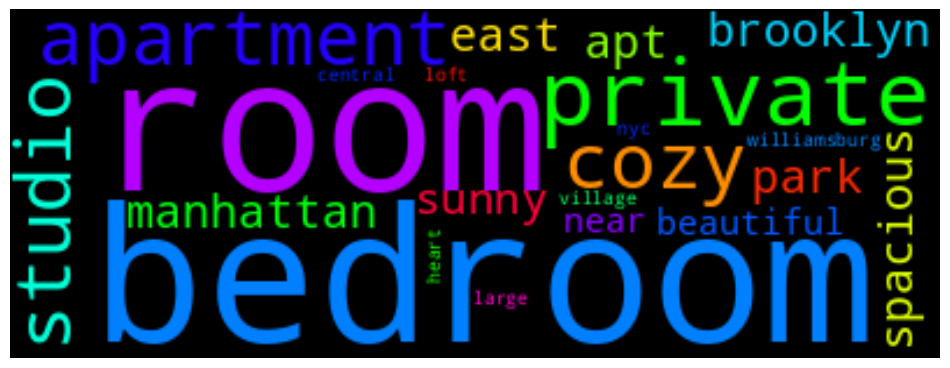

In [144]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count_df.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80, colormap='hsv', width=400, height=150).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

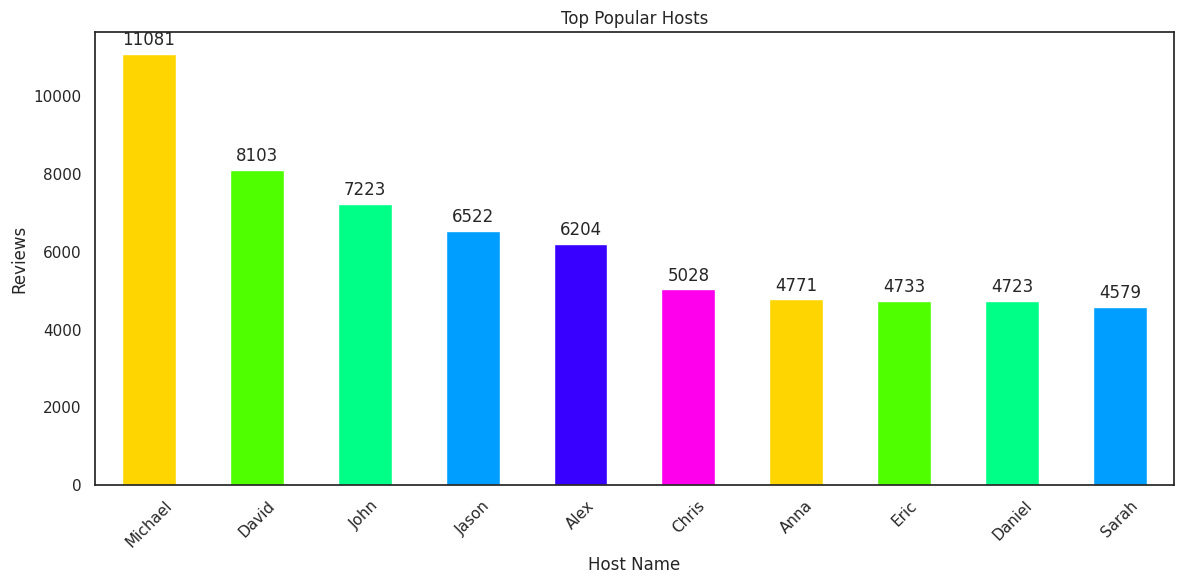

,Review count
host_name,
Michael,11081
David,8103
John,7223
Jason,6522
Alex,6204
Chris,5028
Anna,4771
Eric,4733
Daniel,4723


In [214]:
# getting top popular host with ratings
top_5_hosts = airbnb_df_new.groupby('host_name')['number_of_reviews'].sum().nlargest(10).sort_values(ascending=False)
b=top_5_hosts.plot(kind='bar', x='host_name', y='number_of_reviews', color=sns.palettes.mpl_palette('hsv') )

# Add data labels to the bar plot
for p in b.patches:
    b.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')
plt.xlabel('Host Name')
plt.xticks(rotation = 45)
plt.ylabel('Reviews')
plt.title('Top Popular Hosts')
plt.tight_layout()
plt.show()

Top_Host=pd.DataFrame(top_5_hosts).rename(columns={'host_name': 'Host', 'number_of_reviews': 'Review count'})
Top_Host

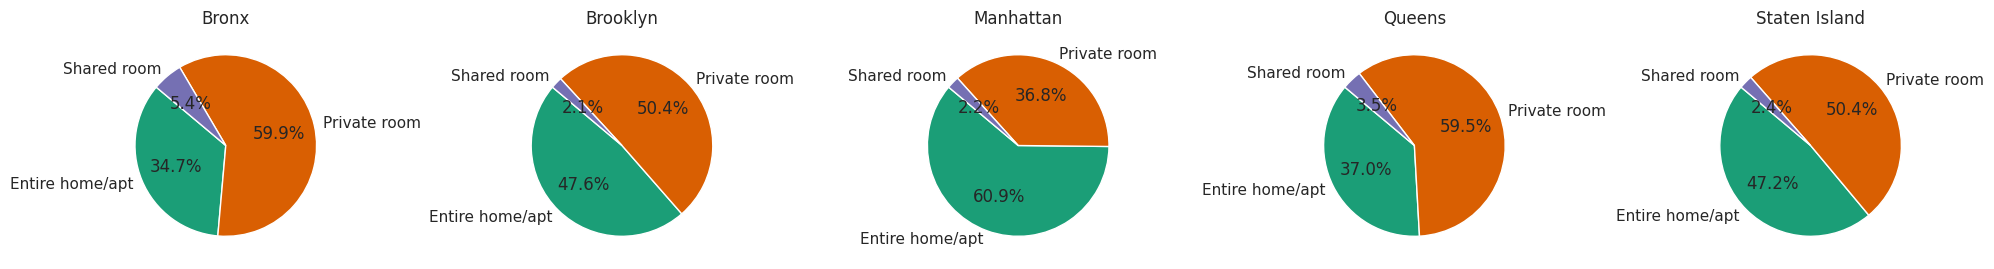

In [213]:
# Group the data by neighbourhood_group and room_type, then calculate the count for each group
room_type_counts = airbnb_df_new.groupby(['neighbourhood_group', 'room_type']).size().unstack()

# Create a pie chart for each neighbourhood group
fig, axs = plt.subplots(ncols=len(room_type_counts), figsize=(20, 20))

# Plot pie charts for each neighbourhood group
for ax, (neighbourhood_group, counts) in zip(axs, room_type_counts.iterrows()):
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.palettes.mpl_palette('Dark2'))
    ax.set_title(neighbourhood_group)

plt.tight_layout()
plt.show()
